In [49]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb

In [2]:
os.chdir('F:\TopMentor_DataScience\Batch 103 Day 40')
df=pd.read_csv('Churn_Modelling.csv',index_col=0)
display (df)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [3]:
df.drop(columns=['CustomerId','Surname'],inplace=True,axis=1)
df
#df1=df.drop('Surname',axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [15]:
x=df.iloc[:,3:] #non-Numberic colums to get correation.
print(x.shape)
x.corr()

(10000, 8)


,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Age,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

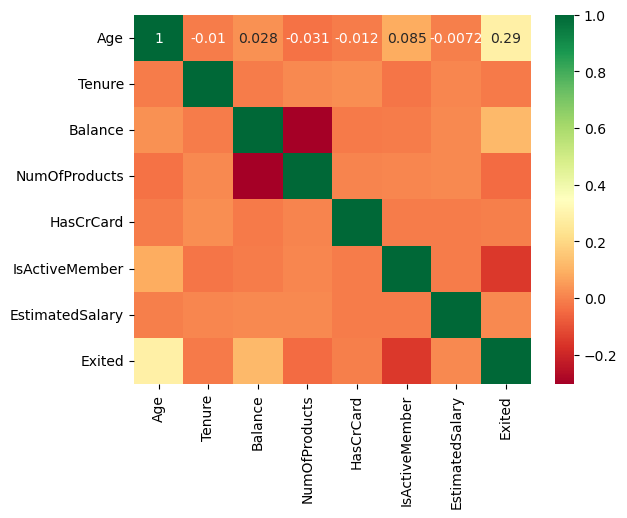

In [7]:
sns.heatmap(x.corr(),annot=True,cmap="RdYlGn")

In [44]:
#    df

In [28]:
#df['Geography']
Geo=pd.get_dummies(df['Geography'],drop_first='True',dtype=int)
Geo
gender=pd.get_dummies(df['Gender'],drop_first='True',dtype=int)
df2=pd.concat([df,Geo,gender],axis=1)
df2=df2.drop(['Geography','Gender'],axis=1)
df2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9997,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9998,709,36,7,0.00,1,0,1,42085.58,1,0,0,0


In [45]:
#df2


In [46]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [53]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }


In [43]:
x=df2.drop(['Exited'],axis=1).values
print(x)
y=df2['Exited'].values
y

[[619.  42.   2. ...   0.   0.   0.]
 [608.  41.   1. ...   0.   1.   0.]
 [502.  42.   8. ...   0.   0.   0.]
 ...
 [709.  36.   7. ...   0.   0.   0.]
 [772.  42.   3. ...   1.   0.   1.]
 [792.  28.   4. ...   0.   0.   0.]]


array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [54]:
classifier=xgb.XGBClassifier()
randomSearch=RandomizedSearchCV(classifier,param_distributions=params,n_iter=100,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

In [57]:
from sklearn import metrics

In [59]:
display (",   ".join(metrics.get_scorer_names()))

'accuracy,   adjusted_mutual_info_score,   adjusted_rand_score,   average_precision,   balanced_accuracy,   completeness_score,   explained_variance,   f1,   f1_macro,   f1_micro,   f1_samples,   f1_weighted,   fowlkes_mallows_score,   homogeneity_score,   jaccard,   jaccard_macro,   jaccard_micro,   jaccard_samples,   jaccard_weighted,   matthews_corrcoef,   max_error,   mutual_info_score,   neg_brier_score,   neg_log_loss,   neg_mean_absolute_error,   neg_mean_absolute_percentage_error,   neg_mean_gamma_deviance,   neg_mean_poisson_deviance,   neg_mean_squared_error,   neg_mean_squared_log_error,   neg_median_absolute_error,   neg_negative_likelihood_ratio,   neg_root_mean_squared_error,   normalized_mutual_info_score,   positive_likelihood_ratio,   precision,   precision_macro,   precision_micro,   precision_samples,   precision_weighted,   r2,   rand_score,   recall,   recall_macro,   recall_micro,   recall_samples,   recall_weighted,   roc_auc,   roc_auc_ovo,   roc_auc_ovo_weighte

In [63]:
from datetime import datetime
start_time=datetime.now()
print(start_time)
randomSearch.fit(x,y)
end_time=datetime.now()
print('time elapsed is' , end_time-start_time)

2024-11-29 17:54:41.777407
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
time elapsed is 0:00:42.902745


In [ ]:
start_time=dat

In [65]:
print(randomSearch.best_params_)
print(randomSearch.best_estimator_)

{'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.7}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [67]:
classifier_2=xgb.XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1,  monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
cv=cross_val_score(classifier,x,y,cv=10)
print(cv)
x_train, x_test, y_train, y_test=train_test_split(x,y)


[0.856 0.857 0.85  0.848 0.852 0.858 0.843 0.866 0.857 0.841]


In [76]:
classifier_2.fit(x_train, y_train)
y_pred=classifier_2.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
class

In [68]:
classifier_2.fit(x,y)
classifier_2.predict()

TypeError: XGBClassifier.predict() missing 1 required positional argument: 'X'